## Run this notebook

You can launch this notbook using mybinder, by clicking the button below.

[Placeholder for Binder link]

## Approach

   1. Identify available dates and temporal frequency for a given collection
   2. Pass STAC item into raster API `/stac/tilejson.json` endpoint
   3. Get time series statistics over available time period to identify seasonal trends
   4. Visualize peak by displaying tile in `folium`

## About the Data

[Ocean Net Primary Production (NPP)](https://oceancolor.gsfc.nasa.gov/atbd/npp/) is the result of CO2 fixation, through photosynthesis, by marine phytoplankton which contain chlorophyll. It is the proportion of phytoplankton-sequestered carbon that enters the oceanic food web and supports a variety of marine life.  

## The Case Study - Walvis Bay, Namibia

Walvis Bay is home to Namibia's largest marine farming center and a well established commercial fishing industry. It's location in the nutrient-rich Benguela upwelling system of the Atlantic Ocean, means producers can rely on this area to cultivate an abundance of shellfish including oysters, mussels, and scallops.

Occasionally the nutrient-rich waters of the Atlantic produce higher than normal NPP levels, resulting in short-lived harmful algal blooms. This is often a result of both favorable temperatures and abundance of sufficient nutrients. The resulting algal blooms can have severe consequences causing massive fish kills, contaminating seafood with toxins and creating an unsafe environment for humans and marine life. Toxins accumulated in the shellfish organs can be subsequently transmitted to humans through consumption and resulting in serious health threats. 

In this example we explore the Ocean NPP dataset over the year 2020 to identify spatial and temporal patterns in NPP in the Walvis Bay area. 

## Querying the STAC API

In [289]:
import requests
from folium import Map, TileLayer


In [290]:
# Provife STAC and RASTER API endpoints
STAC_API_URL = "https://staging-stac.delta-backend.com"
RASTER_API_URL = "https://staging-raster.delta-backend.com"

# Declare collection of interest - Ocean NPP 
collection_name = "MO_NPP_npp_vgpm"

In [291]:
#Fetch STAC collection
collection = requests.get(f"{STAC_API_URL}/collections/{collection_name}").json()
collection

{'id': 'MO_NPP_npp_vgpm',
 'type': 'Collection',
 'links': [{'rel': 'items',
   'type': 'application/geo+json',
   'href': 'https://staging-stac.delta-backend.com/collections/MO_NPP_npp_vgpm/items'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'https://staging-stac.delta-backend.com/'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'https://staging-stac.delta-backend.com/'},
  {'rel': 'self',
   'type': 'application/json',
   'href': 'https://staging-stac.delta-backend.com/collections/MO_NPP_npp_vgpm'}],
 'title': '',
 'extent': {'spatial': {'bbox': [[-180, -90, 180, 90]]},
  'temporal': {'interval': [['2020-01-01T00:00:00Z',
     '2020-12-12T23:59:59Z']]}},
 'license': 'MIT',
 'summaries': {'datetime': ['2020-01-01T00:00:00Z', '2020-12-01T00:00:00Z'],
  'cog_default': {'max': 34561.35546875, 'min': 14.516647338867188}},
 'description': 'Ocean Net Primary Production (NPP): https://oceancolor.gsfc.nasa.gov/atbd/npp/',
 'item_assets': {'cog_default': {'typ

In [292]:
# Verify frequency of data available
collection["dashboard:time_density"]

'month'

In [293]:
# Get collection summary
collection["summaries"]

{'datetime': ['2020-01-01T00:00:00Z', '2020-12-01T00:00:00Z'],
 'cog_default': {'max': 34561.35546875, 'min': 14.516647338867188}}

Great, we can explore the year 2020 time series. Let's create a bounding box to explore the Walvis Bay area of interest (AOI) in Namibia

In [294]:
# Walvis Bay, Namibia
walvis_bay_aoi = {
    "type": "Feature",
    "properties": {},
    "geometry": {
        "coordinates": [
          [
            [
              13.686159004559698,
              -21.700046934333145
            ],
            [
              13.686159004559698,
              -23.241974326585833
            ],
            [
              14.753560168039911,
              -23.241974326585833
            ],
            [
              14.753560168039911,
              -21.700046934333145
            ],
            [
              13.686159004559698,
              -21.700046934333145
            ]
          ]
        ],
        "type": "Polygon"
      }
    }

Let's visualize the AOI we have just created using `folium` 

In [295]:
# We'll plug in the coordinates for a location
# central to the study area and a reasonable zoom level

import folium
m = Map(
    tiles="OpenStreetMap", 
    location=[
         -22.421460,
         14.268801,
        ], zoom_start=8)

folium.GeoJson(walvis_bay_aoi, name="Walvis Bay").add_to(m)
m

Returning back to our STAC API requests, let's check how many total items are available. 

In [296]:
# Check total number of items available
items = requests.get(f"{STAC_API_URL}/collections/{collection_name}/items?limit=100").json()["features"]
print(f"Found {len(items)} items")

Found 12 items


This makes sense is our collection is monthly, so we should have 12 total items.

In [297]:
# Explore one item to see what it contains
items[0]

{'id': 'A_202012.L3m_MO_NPP_npp_vgpm_4km',
 'bbox': [-180.0000050868518,
  -90.00000508655744,
  180.0000050868518,
  89.9999974571629],
 'type': 'Feature',
 'links': [{'rel': 'collection',
   'type': 'application/json',
   'href': 'https://staging-stac.delta-backend.com/collections/MO_NPP_npp_vgpm'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'https://staging-stac.delta-backend.com/collections/MO_NPP_npp_vgpm'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'https://staging-stac.delta-backend.com/'},
  {'rel': 'self',
   'type': 'application/geo+json',
   'href': 'https://staging-stac.delta-backend.com/collections/MO_NPP_npp_vgpm/items/A_202012.L3m_MO_NPP_npp_vgpm_4km'}],
 'assets': {'cog_default': {'href': 's3://veda-data-store-staging/MO_NPP_npp_vgpm/A_202012.L3m_MO_NPP_npp_vgpm_4km.tif',
   'type': 'image/tiff; application=geotiff; profile=cloud-optimized',
   'roles': ['data', 'layer'],
   'title': 'Default COG Layer',
   'description': 'Cloud opti

Now that we have explored the collection metadata by querying the STAC API, we can use the RASTER API to access the data itself.

In [298]:
# the bounding box should be passed to the geojson param as a geojson Feature or FeatureCollection
def generate_stats(item, geojson):
    result = requests.post(
        f"{RASTER_API_URL}/cog/statistics", 
        params={"url": item["assets"]["cog_default"]["href"]},
        json=geojson
    ).json()    
    return {
        **result["properties"], "start_datetime": item["properties"]["start_datetime"]
    }

In [299]:
%%time 
stats = [generate_stats(item, walvis_bay_aoi) for item in items]

CPU times: user 863 ms, sys: 38.5 ms, total: 902 ms
Wall time: 13.2 s


With the function provided above, we can generate statistics for our AOI. In the example below, we'll explore sample statistics available from one of the tiles. 

In [300]:
stats[0]

{'statistics': {'1': {'min': 2288.525146484375,
   'max': 19800.787109375,
   'mean': 4803.135537190083,
   'count': 605.0,
   'sum': 2905897.0,
   'std': 2175.5772113693283,
   'median': 4171.0107421875,
   'majority': 4321.17041015625,
   'minority': 2288.525146484375,
   'unique': 595.0,
   'histogram': [[282.0, 207.0, 73.0, 22.0, 11.0, 1.0, 3.0, 1.0, 0.0, 5.0],
    [2288.525146484375,
     4039.75146484375,
     5790.9775390625,
     7542.20361328125,
     9293.4296875,
     11044.65625,
     12795.8828125,
     14547.1083984375,
     16298.3349609375,
     18049.560546875,
     19800.787109375]],
   'valid_percent': 62.89,
   'masked_pixels': 357.0,
   'valid_pixels': 605.0,
   'percentile_98': 10588.860703124998,
   'percentile_2': 2742.223876953125}},
 'start_datetime': '2020-12-01T00:00:00'}

In [301]:
import pandas as pd

def clean_stats(stats_json) -> pd.DataFrame:
    df = pd.json_normalize(stats_json)
    df.columns = [col.replace("statistics.1.", "") for col in df.columns]
    df["date"] = pd.to_datetime(df["start_datetime"])
    return df

df = clean_stats(stats)

## Visualizing the Data as a Time Series

We can now explore the full time series available (January-December 2020) for the Walvis Bay area of Namibia. We can plot the data set using the code below: 

Text(0.5, 1.0, 'Ocean NPP Values for Walvis Bay, Namibia (2020)')

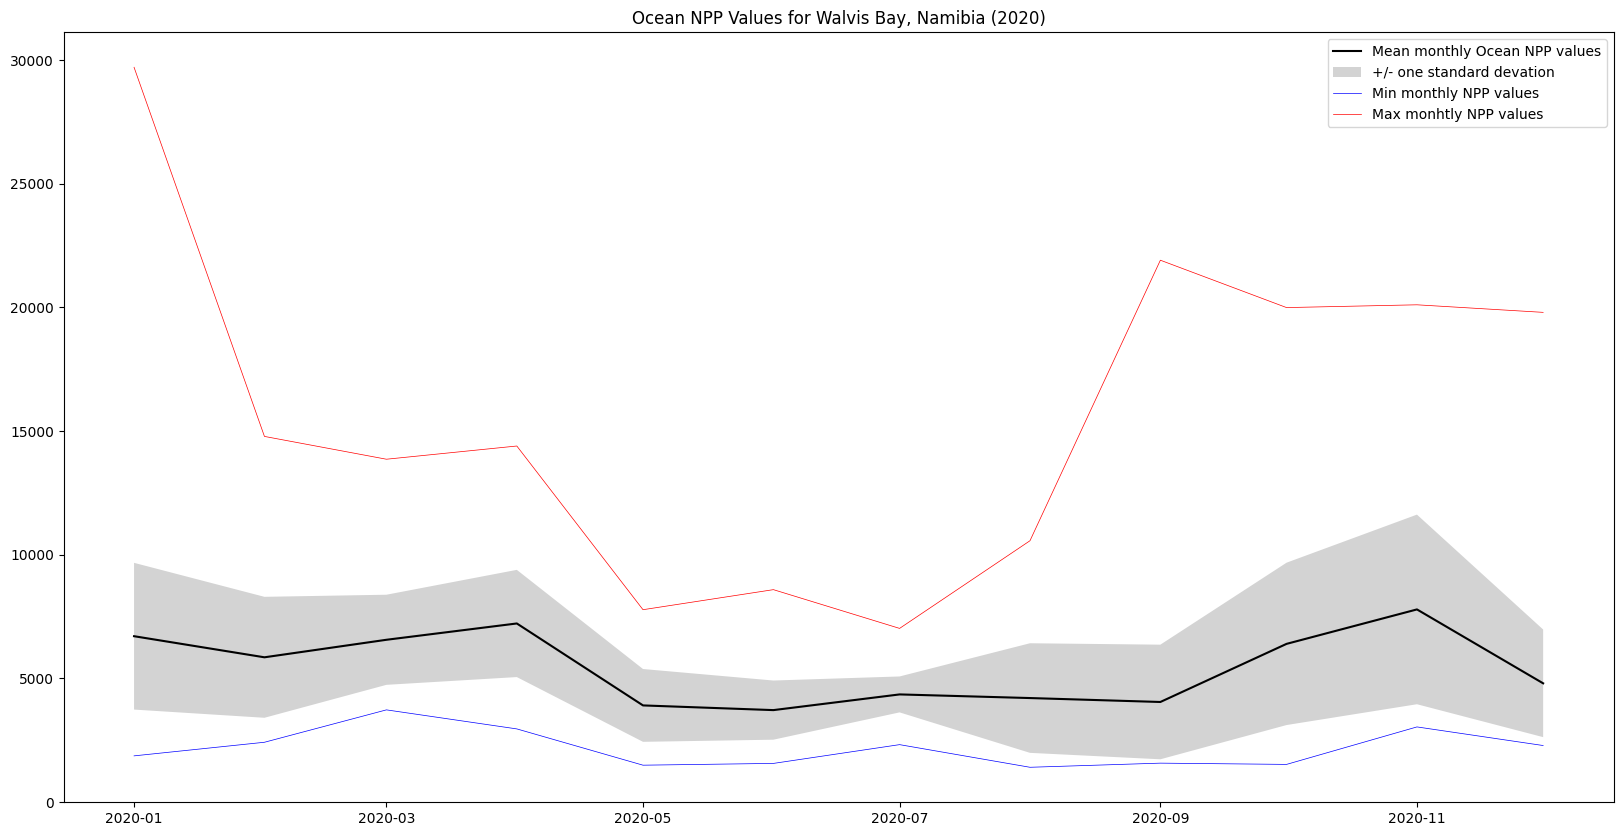

In [302]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))

plt.plot(df["date"], df["mean"], 'black', label="Mean monthly Ocean NPP values")

plt.fill_between(df["date"], df["mean"] + df["std"], df["mean"] - df["std"], facecolor="lightgray", interpolate=False, label="+/- one standard devation")

plt.plot(df["date"], df["min"], color='blue', linestyle="-", linewidth=0.5, label="Min monthly NPP values")
plt.plot(df["date"], df["max"], color='red', linestyle="-", linewidth=0.5, label="Max monhtly NPP values")

plt.legend()
plt.title("Ocean NPP Values for Walvis Bay, Namibia (2020)")

Here, we observe the seasonal variability in oceanic NPP for the Walvis Bay area. The larger peaks in the max values suggests the intensity of these events may vary spatially. Let's explore one of the time steps (e.g., September) where there are higher maximum monthly NPP values to see if this is the case.  

## Visualizing the Raster Imagery

Let's first explore a single tile during one of the relative peaks in October.

In [311]:
print(items[2]['properties']['start_datetime'])

2020-10-01T00:00:00


In [284]:
# Looking at just a single image (one time-stamp in )
item = items[2]

In [285]:
rescale_values = collection["summaries"]["cog_default"]
rescale_values

{'max': 34561.35546875, 'min': 14.516647338867188}

In [286]:
tiles = requests.get(
    f"{RASTER_API_URL}/stac/tilejson.json?collection={item['collection']}&item={item['id']}"
    "&assets=cog_default"
    "&color_formula=gamma+r+1.05&colormap_name=viridis"
    f"&rescale={rescale_values['min']},{rescale_values['max']}", 
).json()
tiles

{'tilejson': '2.2.0',
 'version': '1.0.0',
 'scheme': 'xyz',
 'tiles': ['https://staging-raster.delta-backend.com/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=MO_NPP_npp_vgpm&item=A_202010.L3m_MO_NPP_npp_vgpm_4km&assets=cog_default&color_formula=gamma+r+1.05&colormap_name=viridis&rescale=14.516647338867188%2C34561.35546875'],
 'minzoom': 0,
 'maxzoom': 24,
 'bounds': [-180.0000050868518,
  -90.00000508655744,
  180.0000050868518,
  89.9999974571629],
 'center': [0.0, -3.814697265625e-06, 0]}

In [319]:
# Use bbox initial zoom and map
# Set up a map located w/in event bounds
import folium
m = Map(
    tiles="OpenStreetMap", 
    location=[
         -22.421460,
         14.268801,
        ], zoom_start=8)

map_layer = TileLayer(
    tiles=tiles["tiles"][0],
    attr="VEDA",
)

map_layer.add_to(m)

m

Now we will look at each of the raster tiles that make up this time series to explore the spatial and temporal patterns of NPP observed in Walvis Bay throughout 2020.

In [323]:
import matplotlib.pyplot as plt

for item in items:
    tiles = requests.get(
        f"{RASTER_API_URL}/stac/tilejson.json?collection={item['collection']}&item={item['id']}"
        "&assets=cog_default"
        "&color_formula=gamma+r+1.05&colormap_name=viridis"
        f"&rescale={rescale_values['min']},{rescale_values['max']}", 
        ).json()
    print(tiles['tiles'])


['https://staging-raster.delta-backend.com/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=MO_NPP_npp_vgpm&item=A_202012.L3m_MO_NPP_npp_vgpm_4km&assets=cog_default&color_formula=gamma+r+1.05&colormap_name=viridis&rescale=14.516647338867188%2C34561.35546875']
['https://staging-raster.delta-backend.com/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=MO_NPP_npp_vgpm&item=A_202011.L3m_MO_NPP_npp_vgpm_4km&assets=cog_default&color_formula=gamma+r+1.05&colormap_name=viridis&rescale=14.516647338867188%2C34561.35546875']
['https://staging-raster.delta-backend.com/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=MO_NPP_npp_vgpm&item=A_202010.L3m_MO_NPP_npp_vgpm_4km&assets=cog_default&color_formula=gamma+r+1.05&colormap_name=viridis&rescale=14.516647338867188%2C34561.35546875']
['https://staging-raster.delta-backend.com/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=MO_NPP_npp_vgpm&item=A_202009.L3m_MO_NPP_npp_vgpm_4km&assets=cog_default&color_formula=gamma+r+1.05&colormap_nam

We can use the GIF generation example in the documentation [here](https://nasa-impact.github.io/veda-docs/example-notebooks/gif-generation.html#the-cogcrop-endpoint) to help visualize the raster images as a timeseries over 2020. 

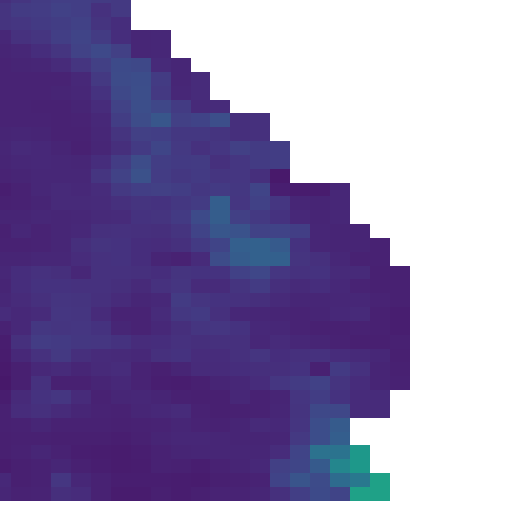

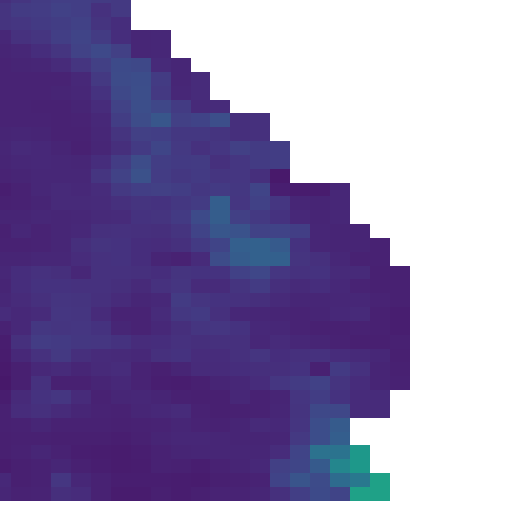

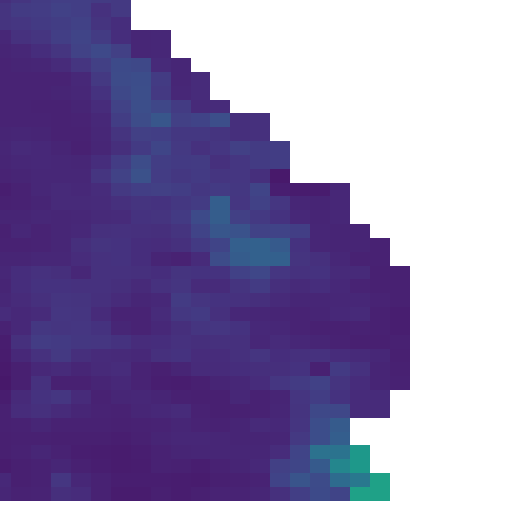

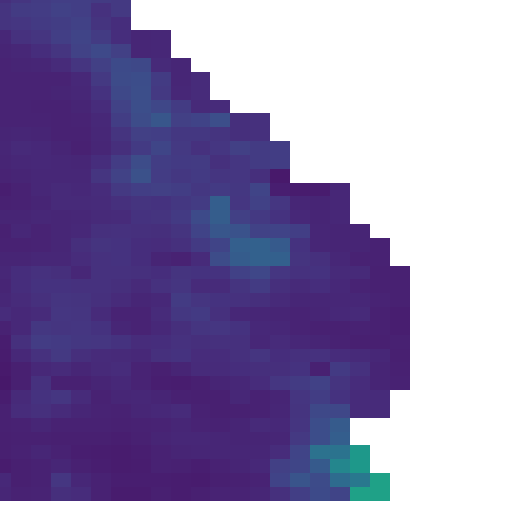

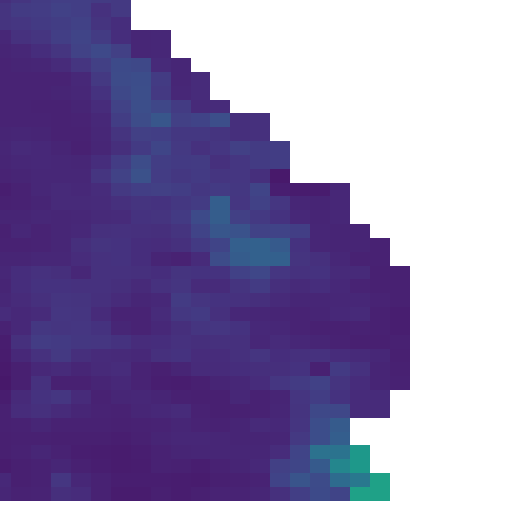

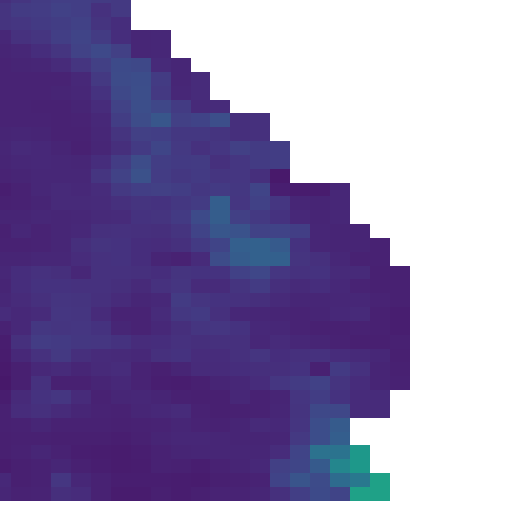

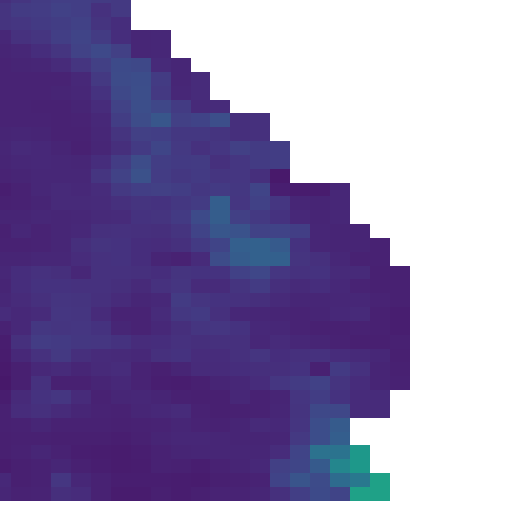

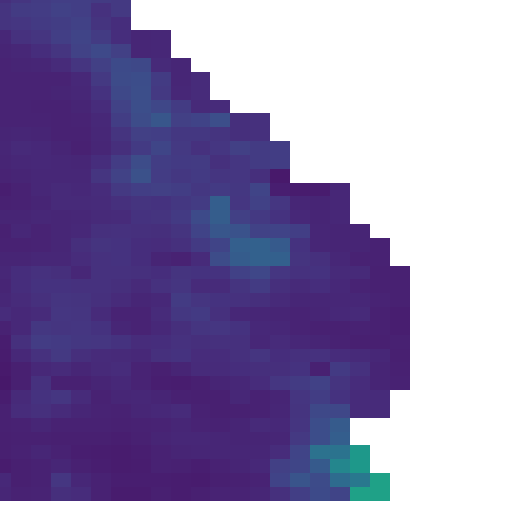

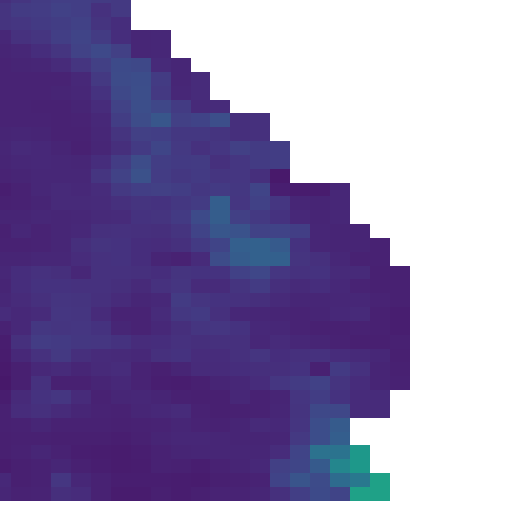

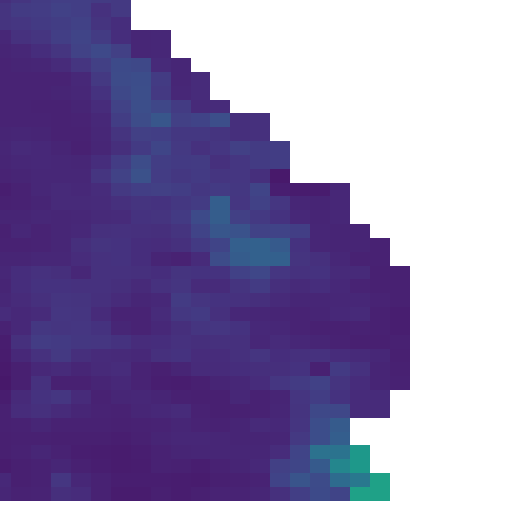

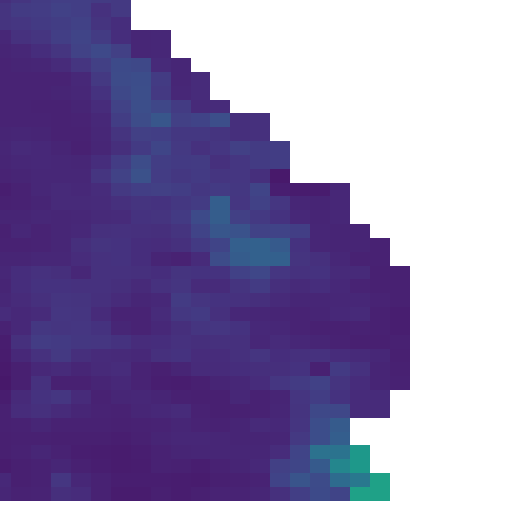

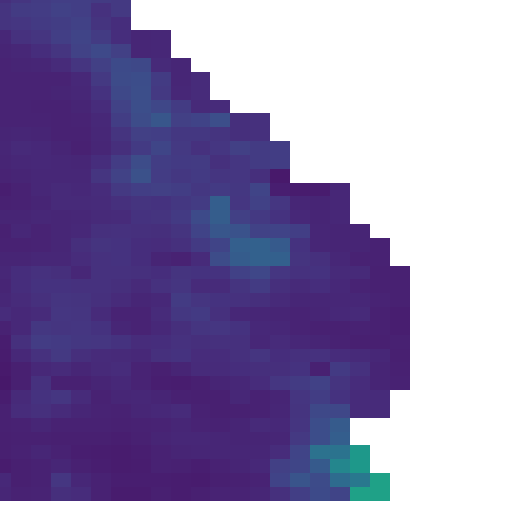

In [339]:
# get PNG bytes from API
import tempfile
from IPython.display import display, Image

COG_DEFAULT = [
    x for x in requests.get(f"{STAC_API_URL}/collections").json()["collections"] if x["id"] == "MO_NPP_npp_vgpm"
][0]["summaries"]["cog_default"]

for item in items:
    image_bytes = requests.post(
        f"{RASTER_API_URL}/cog/crop", 
        params={
            "format": "png",
            "height": 512, 
            "width": 512, 
            "url":items[0]["assets"]["cog_default"]["href"],
            "rescale": f"{COG_DEFAULT['min']},{COG_DEFAULT['max']}",
            "colormap_name": "viridis"
        },
        json=walvis_bay_aoi
    ).content

    # Write to temporary file in order to display
    f = tempfile.NamedTemporaryFile(suffix=".png") 
    f.write(image_bytes)   

    # display PNG!
    display(Image(filename=f.name, height=512, width=512))
    
    #currently is overwriting each temp file, need to revise

To Do: 
* work on revised rescale of raster values, perhaps with quantiles if possible - can't do as `cog_default` only has `min` and `max` values. Would need to revisit using pythonic steps instead of RASTER API
* create static grid of maps to display side-by-side all 12 time steps (zoomed in on Walvis Bay)